In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
raw_df = pd.read_csv('imdb.csv')

In [4]:
raw_df.head()

,web-scraper-order,web-scraper-start-url,Image-src,Name,Rank,Year,Type,Duration,Genre,Rating,MetaScore,Desc,Director_Stars,Votes,Gross
0,1691082094-1,https://www.imdb.com/list/ls099802390/,https://m.media-amazon.com/images/M/MV5BMTYyMT...,Shoah,1,-1985,PG,566 min,"Documentary, History, War",8.7,99.0,Claude Lanzmann's epic documentary recounts th...,Director:\nClaude Lanzmann\n |...,"9,984",$0.02M
1,1691082094-2,https://www.imdb.com/list/ls099802390/,https://m.media-amazon.com/images/S/sash/4Fyxw...,Home,2,(I) (2009),U,118 min,Documentary,8.5,47.0,"With aerial footage from fifty-four countries,...",Director:\nYann Arthus-Bertrand\n ...,NaN,NaN
2,1691082094-3,https://www.imdb.com/list/ls099802390/,https://m.media-amazon.com/images/S/sash/4Fyxw...,Untouchable,3,-2011,15,112 min,"Biography, Comedy, Drama",8.5,57.0,After he becomes a quadriplegic from a paragli...,"Directors:\nOlivier Nakache, \nÉric Toledano\n...",NaN,NaN
3,1691082094-4,https://www.imdb.com/list/ls099802390/,https://m.media-amazon.com/images/S/sash/4Fyxw...,Le Trou,4,-1960,A,131 min,"Crime, Drama, Thriller",8.5,NaN,Distrust and uncertainty arise when four long-...,Director:\nJacques Becker\n | ...,NaN,NaN
4,1691082094-5,https://www.imdb.com/list/ls099802390/,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Man Who Planted Trees,5,-1987,NaN,30 min,"Animation, Short, Drama",8.5,NaN,The story of a shepherd's single handed quest ...,Director:\nFrédéric Back\n | \...,NaN,NaN


In [5]:
films_df = raw_df.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'Image-src', 'Votes', 'Gross'])

In [6]:
films_df.head()

,Name,Rank,Year,Type,Duration,Genre,Rating,MetaScore,Desc,Director_Stars
0,Shoah,1,-1985,PG,566 min,"Documentary, History, War",8.7,99.0,Claude Lanzmann's epic documentary recounts th...,Director:\nClaude Lanzmann\n |...
1,Home,2,(I) (2009),U,118 min,Documentary,8.5,47.0,"With aerial footage from fifty-four countries,...",Director:\nYann Arthus-Bertrand\n ...
2,Untouchable,3,-2011,15,112 min,"Biography, Comedy, Drama",8.5,57.0,After he becomes a quadriplegic from a paragli...,"Directors:\nOlivier Nakache, \nÉric Toledano\n..."
3,Le Trou,4,-1960,A,131 min,"Crime, Drama, Thriller",8.5,NaN,Distrust and uncertainty arise when four long-...,Director:\nJacques Becker\n | ...
4,The Man Who Planted Trees,5,-1987,NaN,30 min,"Animation, Short, Drama",8.5,NaN,The story of a shepherd's single handed quest ...,Director:\nFrédéric Back\n | \...


In [7]:
films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            250 non-null    object 
 1   Rank            250 non-null    int64  
 2   Year            250 non-null    object 
 3   Type            228 non-null    object 
 4   Duration        250 non-null    object 
 5   Genre           250 non-null    object 
 6   Rating          250 non-null    float64
 7   MetaScore       138 non-null    float64
 8   Desc            250 non-null    object 
 9   Director_Stars  250 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 19.7+ KB


In [8]:
films_df.describe()

,Rank,Rating,MetaScore
count,250.000000,250.000000,138.000000
mean,125.500000,7.621200,79.514493
std,72.312977,0.284807,13.059234
min,1.000000,7.200000,35.000000
25%,63.250000,7.400000,72.000000
50%,125.500000,7.600000,82.000000
75%,187.750000,7.800000,89.000000
max,250.000000,8.700000,100.000000


In [9]:
films_df.isna().sum()

Name                0
Rank                0
Year                0
Type               22
Duration            0
Genre               0
Rating              0
MetaScore         112
Desc                0
Director_Stars      0
dtype: int64

In [10]:
print(films_df.duplicated().sum(), 'titres en double')

0 titres en double


In [11]:
films_df['Name'] = films_df['Name'].astype('string')
films_df['Year'] = films_df['Year'].str.extract(r'(\d{4})').astype(int)
films_df['Type'] = films_df['Type'].astype('string')
films_df['Duration'] = films_df['Duration'].str.extract(r'(\d{2,3})').astype(int)
films_df['Genre'] = films_df['Genre'].astype('string')
films_df['Desc'] = films_df['Desc'].astype('string')
films_df['Director_Stars'] = films_df['Director_Stars'].astype('string')

In [12]:
films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            250 non-null    string 
 1   Rank            250 non-null    int64  
 2   Year            250 non-null    int32  
 3   Type            228 non-null    string 
 4   Duration        250 non-null    int32  
 5   Genre           250 non-null    string 
 6   Rating          250 non-null    float64
 7   MetaScore       138 non-null    float64
 8   Desc            250 non-null    string 
 9   Director_Stars  250 non-null    string 
dtypes: float64(2), int32(2), int64(1), string(5)
memory usage: 17.7 KB


Text(0.5, 1.0, 'Numero de titres par année')

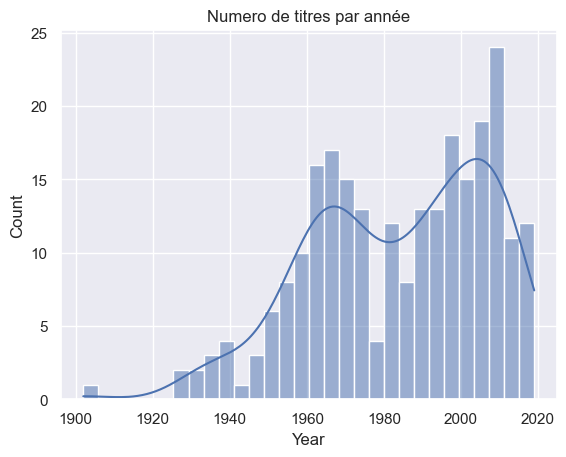

In [13]:
sns.histplot(films_df['Year'], bins=30, kde=True)
plt.title('Numero de titres par année')

Text(0.5, 1.0, 'Numero de titres par Classement')

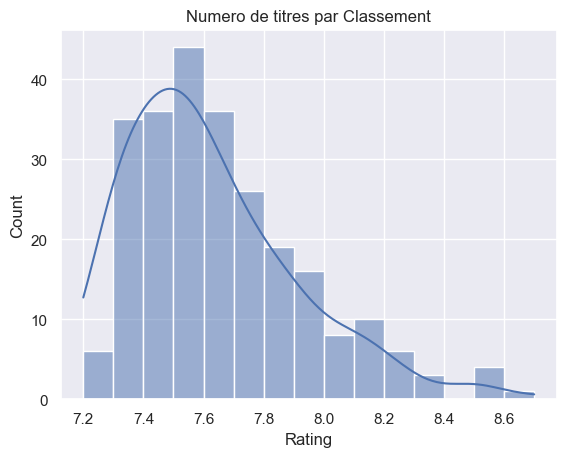

In [14]:
sns.histplot(films_df['Rating'], bins=15, kde=True)
plt.title('Numero de titres par Classement')

In [15]:
genres = films_df['Genre'].str.split(", ").explode().unique()
print("Il y a", genres.size, "genres uniques.")


genre_dummies = films_df['Genre'].str.split(',').apply(lambda x: '|'.join(i.strip() for i in x)).str.get_dummies(sep='|')

films_df = pd.concat([films_df, genre_dummies], axis=1)

genre_counts = genre_dummies.sum()
print("Numero de films tagués dans chaque genre:")
print(genre_counts)

Il y a 22 genres uniques.
Numero de films tagués dans chaque genre:
Action           6
Adventure       16
Animation       13
Biography       14
Comedy          81
Crime           60
Documentary      8
Drama          209
Family           4
Fantasy         14
History         11
Horror           4
Music           12
Musical          2
Mystery         16
Romance         64
Sci-Fi           3
Short            4
Sport            1
Thriller        25
War             14
Western          1
dtype: int64


Text(0.5, 1.0, 'Numero de Titres dans chaque genre')

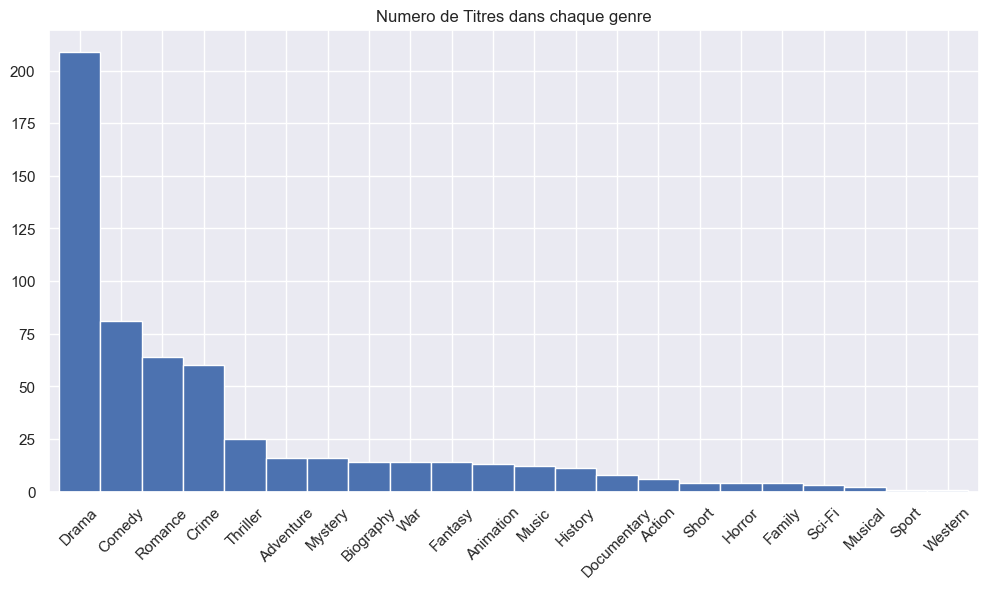

In [16]:
plt.figure(figsize=(12, 6))
genre_counts.sort_values(ascending=False, inplace=True)
genre_counts.plot(kind='bar', width=1)
plt.xticks(rotation=45)
plt.title('Numero de Titres dans chaque genre')

Top 25 des comédies françaises par classement


(7.0, 9.0)

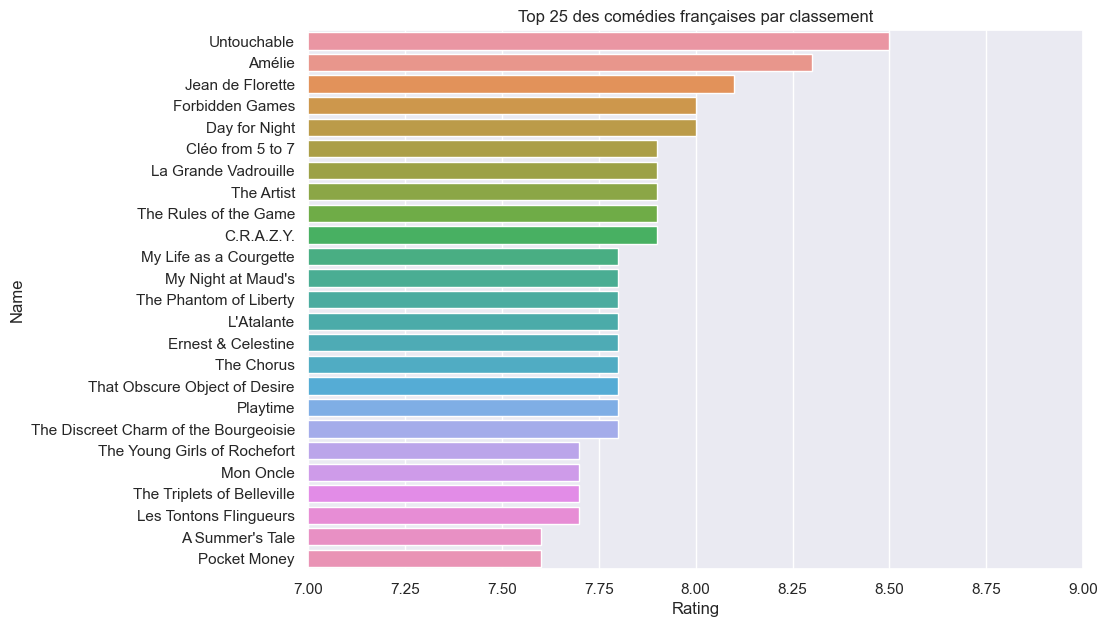

In [17]:
comedy_films = films_df[films_df['Comedy'] == 1]
comedy_films.sort_values(by='Rating', ascending=False, inplace=True)
print('Top 25 des comédies françaises par classement')
plt.figure(figsize=(10,7))
sns.barplot(data=comedy_films.head(25), x='Rating', y='Name')
plt.title('Top 25 des comédies françaises par classement')
plt.xlim(7,9)

(7.0, 9.0)

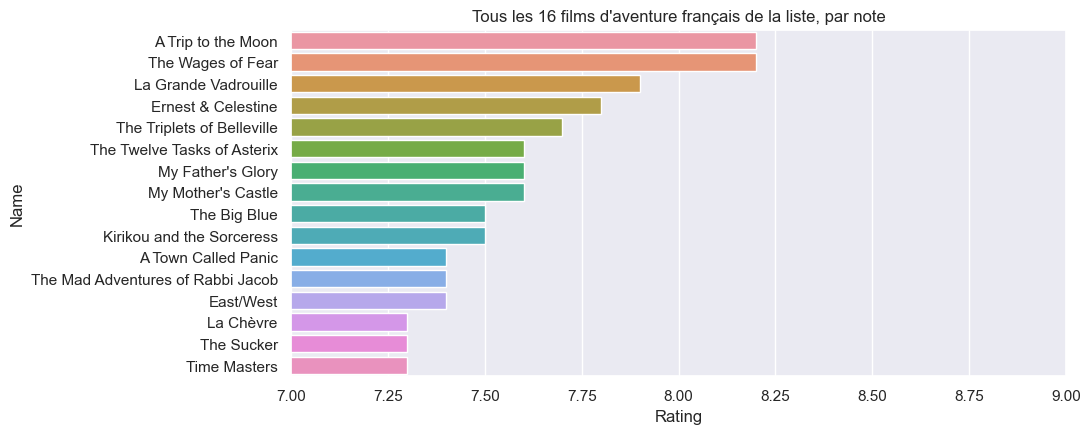

In [18]:
adventure_films = films_df[films_df['Adventure'] == 1]
adventure_films.sort_values(by='Rating', ascending=False, inplace=True)
plt.figure(figsize=(10,4.5))
sns.barplot(data=adventure_films.head(16), x='Rating', y='Name')
plt.title("Tous les 16 films d'aventure français de la liste, par note")
plt.xlim(7,9)

(7.0, 9.0)

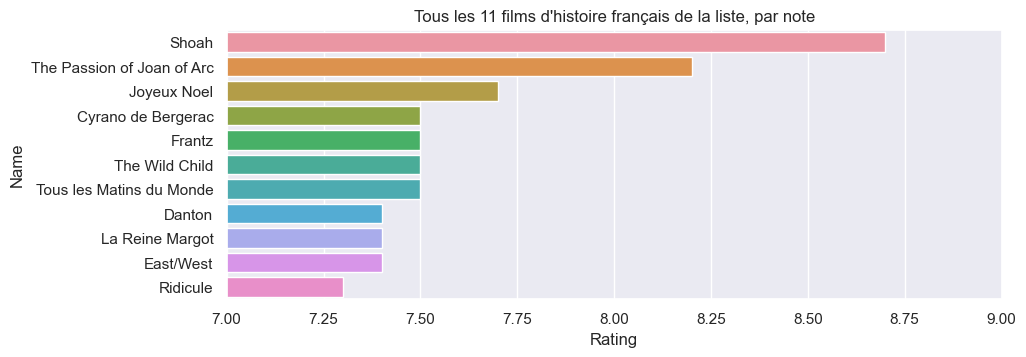

In [19]:
history_films = films_df[films_df['History'] == 1]
history_films.sort_values(by='Rating', ascending=False, inplace=True)
plt.figure(figsize=(10,3.5))
sns.barplot(data=history_films.head(11), x='Rating', y='Name')
plt.title("Tous les 11 films d'histoire français de la liste, par note")
plt.xlim(7,9)

(7.0, 9.0)

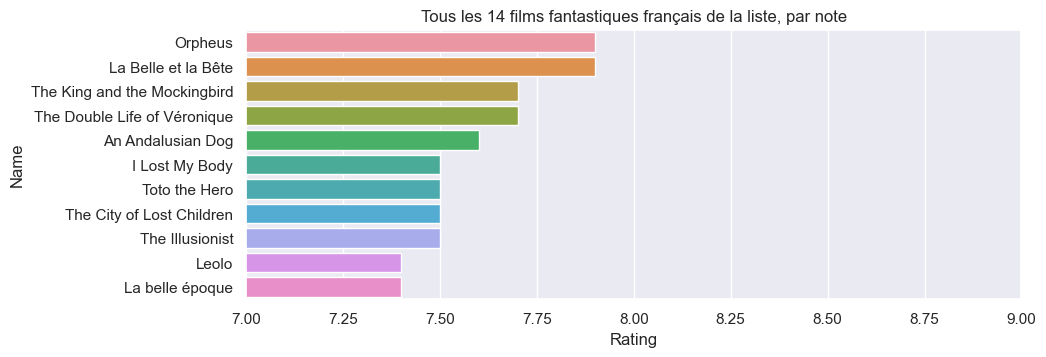

In [20]:
fantasy_films = films_df[films_df['Fantasy'] == 1]
fantasy_films.sort_values(by='Rating', ascending=False, inplace=True)
plt.figure(figsize=(10,3.5))
sns.barplot(data=fantasy_films.head(11), x='Rating', y='Name')
plt.title("Tous les 14 films fantastiques français de la liste, par note")
plt.xlim(7,9)

(7.0, 9.0)

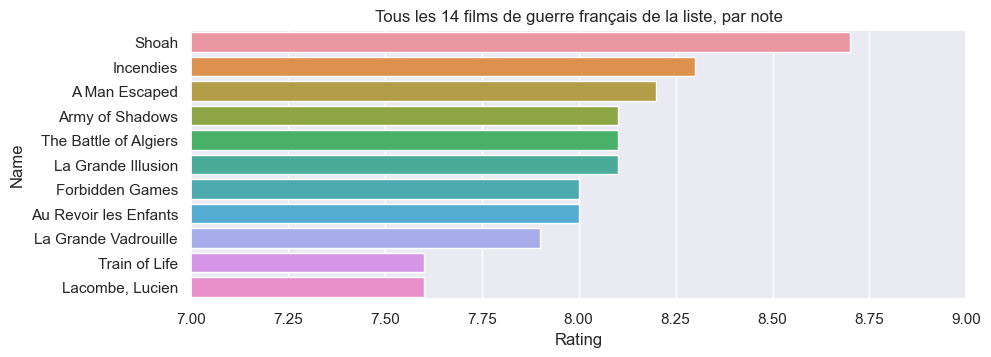

In [21]:
war_films = films_df[films_df['War'] == 1]
war_films.sort_values(by='Rating', ascending=False, inplace=True)
plt.figure(figsize=(10,3.5))
sns.barplot(data=war_films.head(11), x='Rating', y='Name')
plt.title("Tous les 14 films de guerre français de la liste, par note")
plt.xlim(7,9)

(7.0, 9.0)

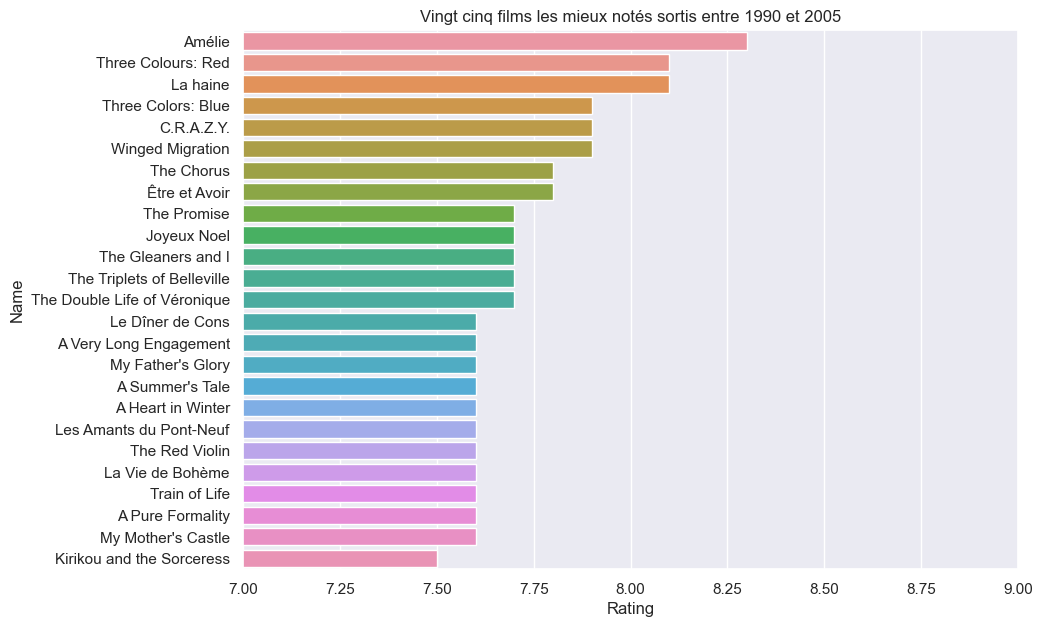

In [22]:
films_1990_to_2005 = films_df[(films_df['Year'] >= 1990) & (films_df['Year'] <= 2005)]
films_1990_to_2005.sort_values(by='Rating', ascending=False, inplace=True)
plt.figure(figsize=(10,7))
sns.barplot(data=films_1990_to_2005.head(25), x='Rating', y='Name')
plt.title("Vingt cinq films les mieux notés sortis entre 1990 et 2005")
plt.xlim(7,9)